In [1]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rc, rcParams
import numpy as np
from pathlib import Path
Path("figures").mkdir(exist_ok=True)
rcParams.update({"font.size": 18})
rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
rc("text", usetex=True)

### Figure 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


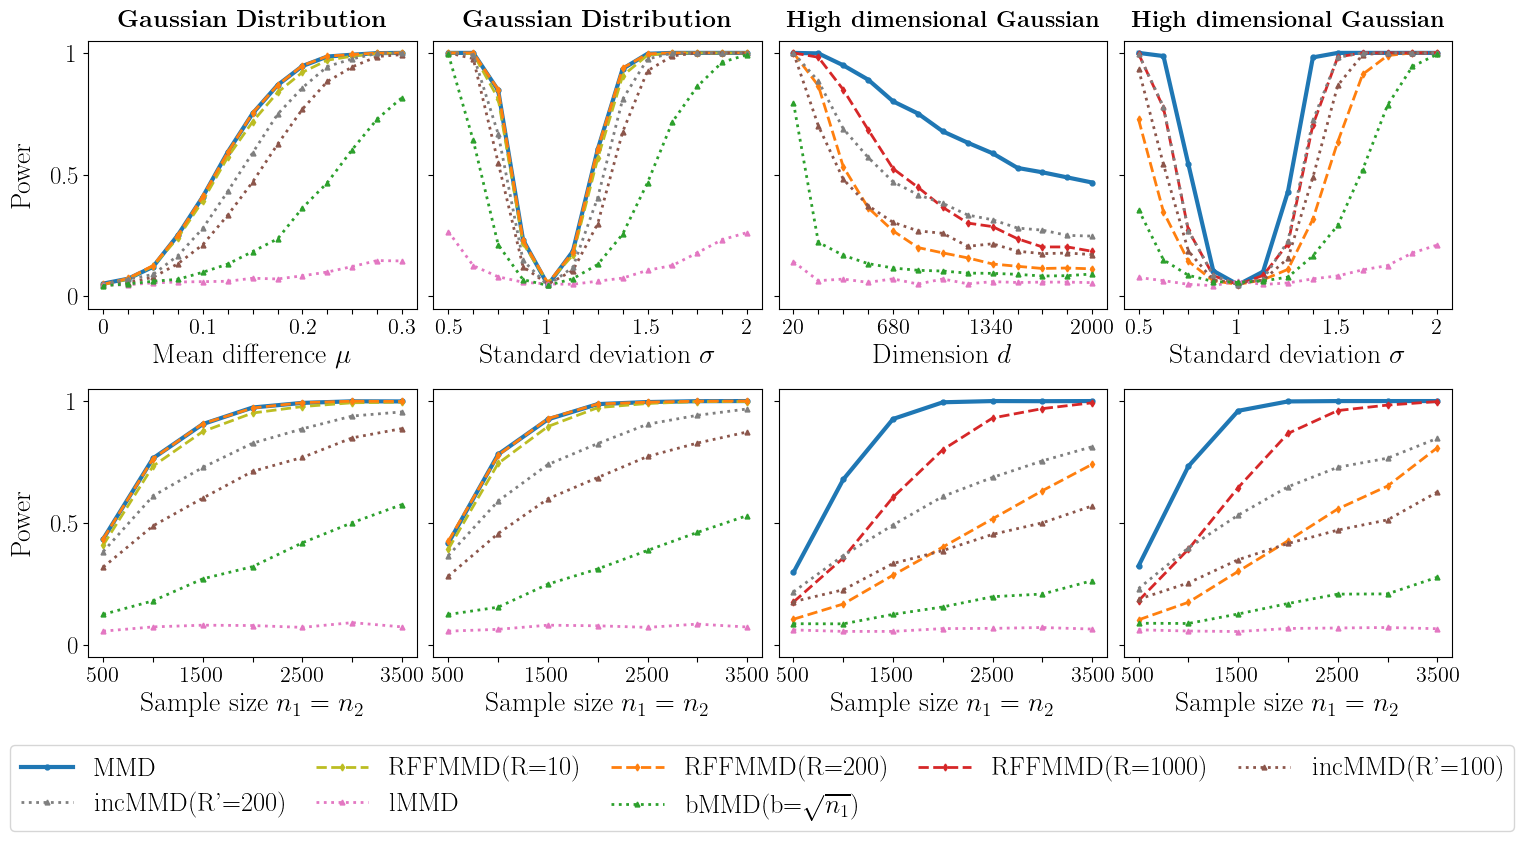

In [2]:
# Main figure
scale = 0.8

f = plt.figure(figsize=(22 * scale,10 * scale))
gs = gridspec.GridSpec(2, 4)
axs = np.array([[f.add_subplot(gs[0,0]),f.add_subplot(gs[0,1]),f.add_subplot(gs[0,2]),f.add_subplot(gs[0,3])],
       [f.add_subplot(gs[1,0]),f.add_subplot(gs[1,1]),f.add_subplot(gs[1,2]),f.add_subplot(gs[1,3])]])
gs.update(hspace=0.3)
gs.update(wspace=0.05)


# Experiment 0 : Gaussian dist. - varying mean difference
# Experiment 1 : Gaussian dist. - varying sample size with mean difference
# Experiment 2 : Gaussian dist. - varying variance difference
# Experiment 3 : Gaussian dist. - varying sample size with variance difference
# Experiment 4 : High dimensional Gaussian dist. - varying dimension
# Experiment 5 : High dimensional Gaussian dist. - varying sample size
# Experiment 6 : High dimensional Gaussian dist. - varying covariance difference
# Experiment 7 : High dimensional Gaussian dist. - varying sample size with covariance difference


experiment_plot_location = [(0,0),(1,0),(0,1),(1,1),(0,2),(1,2),(0,3),(1,3)]


#   The plot is drawn in the following array.
#
#    experiment 0   experiment 3   experiment 5   experiment 7
#    experiment 1   experiment 4   experiment 6   experiment 8
#




experiment_name = np.array([["gaussian_vary_mean_diff", "gaussian_vary_var_diff", "HDgaussian_vary_loc_diff", "HDgaussian_vary_var_diff"],
                            ["gaussian_vary_mean_size", "gaussian_vary_var_size", "HDgaussian_vary_loc_size", "HDgaussian_vary_var_size"]])

title = np.array([[r"\textbf{Gaussian Distribution}", r"\textbf{Gaussian Distribution}", r"\textbf{High dimensional Gaussian}", r"\textbf{High dimensional Gaussian}" ],
                  ["", "", "", ""]])

x_label = np.array([[r"Mean difference $\mu$", r"Standard deviation $\sigma$", r"Dimension $d$", r"Standard deviation $\sigma$"],
                    [r"Sample size $n_1=n_2$", r"Sample size $n_1=n_2$", r"Sample size $n_1=n_2$", r"Sample size $n_1=n_2$"]])

y_label = np.array([["Power", "", "", ""],
                    ["Power", "", "", ""]])

xticklabels = [[["0","","","","0.1","","","","0.2","","","","0.3"], ["0.5","","","","1","","","","1.5","","","","2"], ["20", "", "", "", "680", "","", "", "1340", "", "","", "2000"], ["0.5","","","","1","","","","1.5","","","","2"]],
                        [["500","","1500","","2500","","3500"], ["500","","1500","","2500","","3500"], ["500","","1500","","2500","","3500"], ["500","","1500","","2500","","3500"]]]

yticklabels = [[["0","0.5","1"],["","",""],["","",""],["","",""]],
               [["0","0.5","1"],["","",""],["","",""],["","",""]]]


experiment_params=[experiment_name,
                   title,
                   x_label,
                   y_label,
                   xticklabels,
                   yticklabels]

# Parameters

markersize = 3.5

# load a list of tests including RFFMMD(R=10) but not RFFMMD(R=1000) [Scenario 1]
tests_names = ["MMD",  # MMD
               "RFFMMD(R=10)",  # RFFMMD(R=10)
               "RFFMMD(R=200)",  # RFFMMD(R=200)
               "incMMD(R'=100)",  # incMMD(R'=100)
               "incMMD(R'=200)",  # incMMD(R'=200)
               "lMMD",  # lMMD
               r"bMMD(b=$\sqrt{n_1}$)"  # bMMD
              ]

styles = [
    'solid',  # MMD
    'dashed', # RFFMMD(R=10)
    'dashed', # RFFMMD(R=200)
    'dotted', # incMMD(R'=100)
    'dotted', # incMMD(R'=200)
    'dotted', # lMMD
    'dotted'  # bMMD
]

markers = np.array(["o", # MMD
                    "d", # RFFMMD(R=10)
                    "d", # RFFMMD(R=200)
                    "^", # incMMD(R'=100)
                    "^", # incMMD(R'=200)
                    "^", # lMMD
                    "^"  # bMMD
                    ])

colors = np.array(["C0", # MMD
                   "C8", # RFFMMD(R=10)
                   "C1", # RFFMMD(R=200)
                   "C5", # incMMD(R'=100)
                   "C7", # incMMD(R'=200)
                   "C6", # lMMD
                   "C2"  # bMMD
                  ])
linewidths=np.array([3,  # MMD
                     2,  # except MMD
                     2,
                     2,
                     2,
                     2,
                     2,
                    ])

test_params=[tests_names,
             styles,
             markers,
             colors,
             linewidths,
             markersize]


def drawer(idx, experiment_params, test_params, fs=18):
    power = np.load(f"results/{experiment_params[0][idx]}_power.npy") 
    varying = np.load(f"results/{experiment_params[0][idx]}_varying.npy") 
    for j in range(len(test_params[0])):
        axs[idx].plot(varying, power[j], color=test_params[3][j], marker=test_params[2][j], linestyle=test_params[1][j], label=test_params[0][j], markersize=test_params[5], linewidth=test_params[4][j])
    axs[idx].set_title(experiment_params[1][idx], fontsize=fs, pad=10)
    axs[idx].set_xlabel(experiment_params[2][idx], fontsize=fs+2)
    axs[idx].set_xticks(varying)
    axs[idx].set_xticklabels(experiment_params[4][idx[0]][idx[1]])
    axs[idx].set_ylabel(experiment_params[3][idx], labelpad=10, fontsize=fs+2)
    axs[idx].set_yticks([0, 0.5, 1])
    axs[idx].set_yticklabels(experiment_params[5][idx[0]][idx[1]])
    axs[idx].set_ylim(-0.05, 1.05)
    axs[idx].tick_params(axis='x', which='major', labelsize=fs - 2)



# Experiment 0 : Gaussian dist. - varying mean difference
loc = experiment_plot_location[0]
drawer(loc,experiment_params, test_params, fs=18)

# Experiment 1 : Gaussian dist. - varying sample size with mean difference
loc = experiment_plot_location[1]
drawer(loc,experiment_params, test_params, fs=18)

# Experiment 2 : Gaussian dist. - varying variance difference
loc = experiment_plot_location[2]
drawer(loc,experiment_params, test_params, fs=18)

# Experiment 3 : Gaussian dist. - varying sample size with variance difference
loc = experiment_plot_location[3]
drawer(loc,experiment_params, test_params, fs=18)



#------------------------------keep 'RFFMMD(R=10)' handles and labels--------#
handles, labels = axs[loc].get_legend_handles_labels()
handles_10 = [handles[1]]
labels_10 = [labels[1]]
#------------------------------keep 'RFFMMD(R=10)' handles and labels--------#


# Change handles and labels : load a list of tests including RFFMMD(R=1000) but not RFFMMD(R=10) [Scenario 2]

tests_names = ["MMD",  # MMD
               "RFFMMD(R=200)",  # RFFMMD(R=200)
               "RFFMMD(R=1000)",  # RFFMMD(R=1000)
               "incMMD(R'=100)",  # incMMD(R'=100)
               "incMMD(R'=200)",  # incMMD(R'=200)
               "lMMD",  # lMMD
               r"bMMD(b=$\sqrt{n_1}$)"  # bMMD
              ]

colors = np.array(["C0", # MMD
                   "C1", # RFFMMD(R=200)
                   "C3", # RFFMMD(R=1000)
                   "C5", # incMMD(R'=100)
                   "C7", # incMMD(R'=200)
                   "C6", # lMMD
                   "C2"  # bMMD
                  ])

test_params=[tests_names,
             styles,
             markers,
             colors,
             linewidths,
             markersize]



# Experiment 4 : High dimensional Gaussian dist. - varying dimension
loc = experiment_plot_location[4]
drawer(loc,experiment_params, test_params, fs=18)
axs[loc].set_title(experiment_params[1][loc], fontsize=17, pad=10)

# Experiment 5 : High dimensional Gaussian dist. - varying sample size
loc = experiment_plot_location[5]
drawer(loc,experiment_params, test_params, fs=18)

# Experiment 6 : High dimensional Gaussian dist. - varying covariance difference
loc = experiment_plot_location[6]
drawer(loc,experiment_params, test_params, fs=18)
axs[loc].set_title(experiment_params[1][loc], fontsize=17, pad=10)

# Experiment 7 : High dimensional Gaussian dist. - varying sample size with covariance difference
loc = experiment_plot_location[7]
drawer(loc,experiment_params, test_params, fs=18)




# merge handles and labels
handles, labels = axs[loc].get_legend_handles_labels()
handles = handles[:1]+handles_10+handles[1:]
labels = labels[:1]+labels_10+labels[1:]

# Legend
order_legend = [0,5,1,6,2,7,3,4]
axs[loc].legend(
    [handles[index] for index in order_legend],
    [labels[index] for index in order_legend],
    fontsize=19,
    ncol=5,
    handleheight=0.5,
    labelspacing=0.4,
    columnspacing=1.1,
    loc="lower center",
    bbox_to_anchor=(-1.1,-0.7),
)

# Save Figure
f.savefig("figures/Scenario_12.eps", bbox_inches="tight")

### Figure 2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


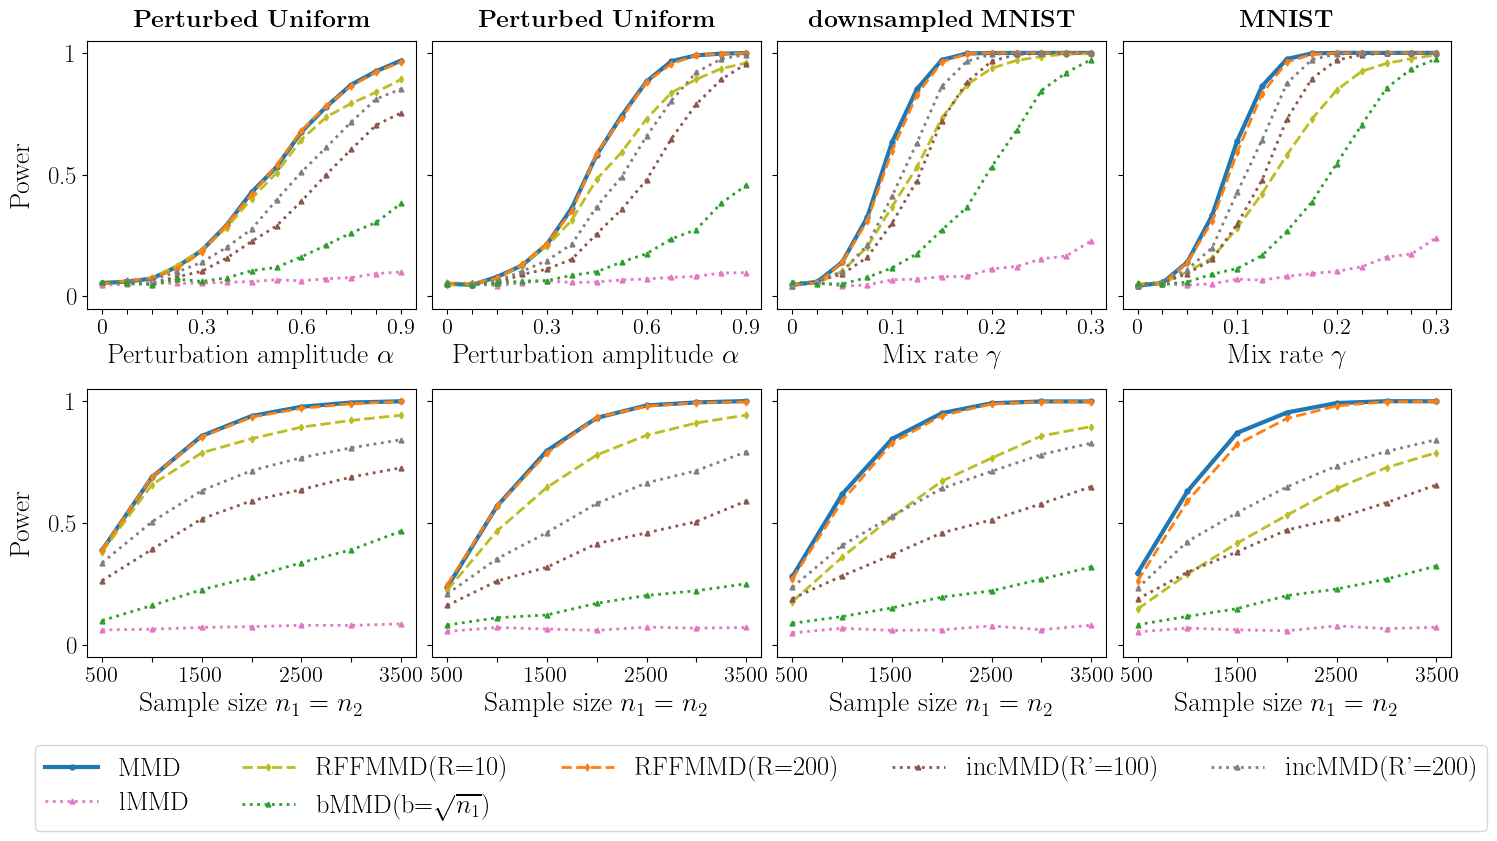

In [4]:
# Main figure
scale = 0.8

f = plt.figure(figsize=(22 * scale,10 * scale))
gs = gridspec.GridSpec(2, 4)
axs = np.array([[f.add_subplot(gs[0,0]),f.add_subplot(gs[0,1]),f.add_subplot(gs[0,2]),f.add_subplot(gs[0,3])],
       [f.add_subplot(gs[1,0]),f.add_subplot(gs[1,1]),f.add_subplot(gs[1,2]),f.add_subplot(gs[1,3])]])
gs.update(hspace=0.3)
gs.update(wspace=0.05)


# Experiment 0 : Perturbed Uniform dist. - dimension = 1, varying scale
# Experiment 1 : Perturbed Uniform dist. - dimension = 1, varying sample size
# Experiment 2 : Perturbed Uniform dist. - dimension = 2, varying scale
# Experiment 3 : Perturbed Uniform dist. - dimension = 2, varying sample size
# Experiment 4 : downsampled MNIST - varying mixing rate
# Experiment 5 : downsampled MNIST - varying sample size
# Experiment 6 : MNIST - varying mixing rate
# Experiment 7 : MNIST - varying sample size


experiment_plot_location = [(0,0),(1,0),(0,1),(1,1),(0,2),(1,2),(0,3),(1,3)]


#   The plot is drawn in the following array.
#
#    experiment 0   experiment 3   experiment 5   experiment 7
#    experiment 1   experiment 4   experiment 6   experiment 8
#




experiment_name= np.array([["PU_d1_vary_scale_diff","PU_d2_vary_scale_diff","downsampled_MNIST_vary_mixrate_diff","MNIST_vary_mixrate_diff"],
                           ["PU_d1_vary_scale_size","PU_d2_vary_scale_size","downsampled_MNIST_vary_mixrate_size","MNIST_vary_mixrate_size"]])

title = np.array([[r"\textbf{Perturbed Uniform}", r"\textbf{Perturbed Uniform}", r"\textbf{downsampled MNIST}", r"\textbf{MNIST}" ],
                  ["", "", "", ""]])

x_label = np.array([[r"Perturbation amplitude $\alpha$", r"Perturbation amplitude $\alpha$", r"Mix rate $\gamma$", r"Mix rate $\gamma$"],
                    [r"Sample size $n_1=n_2$", r"Sample size $n_1=n_2$", r"Sample size $n_1=n_2$", r"Sample size $n_1=n_2$"]])

y_label = np.array([["Power", "", "", ""],
                    ["Power", "", "", ""]])

xticklabels = [[["0","","","","0.3","","","","0.6","","","","0.9"], ["0","","","","0.3","","","","0.6","","","","0.9"], ["0", "", "", "", "0.1", "", "", "", "0.2", "","","", "0.3"], ["0", "", "", "", "0.1", "", "", "", "0.2", "","","", "0.3"]],
                        [["500","","1500","","2500","","3500"], ["500","","1500","","2500","","3500"], ["500","","1500","","2500","","3500"], ["500","","1500","","2500","","3500"]]]

yticklabels = [[["0","0.5","1"],["","",""],["","",""],["","",""]],
               [["0","0.5","1"],["","",""],["","",""],["","",""]]]


experiment_params=[experiment_name,
                   title,
                   x_label,
                   y_label,
                   xticklabels,
                   yticklabels]

# Parameters

markersize = 3.5

# load a list of tests including RFFMMD(R=10) but not RFFMMD(R=1000) [Scenario 1]
tests_names = ["MMD",  # MMD
               "RFFMMD(R=10)",  # RFFMMD(R=10)
               "RFFMMD(R=200)",  # RFFMMD(R=200)
               "incMMD(R'=100)",  # incMMD(R'=100)
               "incMMD(R'=200)",  # incMMD(R'=200)
               "lMMD",  # lMMD
               r"bMMD(b=$\sqrt{n_1}$)"  # bMMD
              ]

styles = [
    'solid',  # MMD
    'dashed', # RFFMMD(R=10)
    'dashed', # RFFMMD(R=200)
    'dotted', # incMMD(R'=100)
    'dotted', # incMMD(R'=200)
    'dotted', # lMMD
    'dotted'  # bMMD
]

markers = np.array(["o", # MMD
                    "d", # RFFMMD(R=10)
                    "d", # RFFMMD(R=200)
                    "^", # incMMD(R'=100)
                    "^", # incMMD(R'=200)
                    "^", # lMMD
                    "^"  # bMMD
                    ])

colors = np.array(["C0", # MMD
                   "C8", # RFFMMD(R=10)
                   "C1", # RFFMMD(R=200)
                   "C5", # incMMD(R'=100)
                   "C7", # incMMD(R'=200)
                   "C6", # lMMD
                   "C2"  # bMMD
                  ])
linewidths=np.array([3,  # MMD
                     2,  # except MMD
                     2,
                     2,
                     2,
                     2,
                     2,
                    ])

test_params=[tests_names,
             styles,
             markers,
             colors,
             linewidths,
             markersize]

# Experiment 0 : Perturbed Uniform dist. - dimension = 1, varying scale
loc = experiment_plot_location[0]
drawer(loc,experiment_params, test_params, fs=18)

# Experiment 1 : Perturbed Uniform dist. - dimension = 1, varying sample size
loc = experiment_plot_location[1]
drawer(loc,experiment_params, test_params, fs=18)

# Experiment 2 : Perturbed Uniform dist. - dimension = 2, varying scale
loc = experiment_plot_location[2]
drawer(loc,experiment_params, test_params, fs=18)

# Experiment 3 : Perturbed Uniform dist. - dimension = 2, varying sample size
loc = experiment_plot_location[3]
drawer(loc,experiment_params, test_params, fs=18)

# Experiment 4 : downsampled MNIST - varying mixing rate
loc = experiment_plot_location[4]
drawer(loc,experiment_params, test_params, fs=18)

# Experiment 5 : downsampled MNIST - varying sample size
loc = experiment_plot_location[5]
drawer(loc,experiment_params, test_params, fs=18)

# Experiment 6 : MNIST - varying mixing rate
loc = experiment_plot_location[6]
drawer(loc,experiment_params, test_params, fs=18)

# Experiment 7 : MNIST - varying sample size
loc = experiment_plot_location[7]
drawer(loc,experiment_params, test_params, fs=18)



handles, labels = axs[loc].get_legend_handles_labels()

order_legend = [0,5,1,6,2,3,4]
axs[loc].legend(
    [handles[index] for index in order_legend],
    [labels[index] for index in order_legend],
    fontsize=19,
    ncol=5,
    handleheight=0.5,
    labelspacing=0.4,
    columnspacing=2,
    loc="lower center",
    bbox_to_anchor=(-1.1,-0.7),
)

# Save Figure
f.savefig("figures/Scenario_34.eps", bbox_inches="tight")